<h1 style="color:red; text-align:center; text-decoration:underline;">Ajustement des Hyperparamètres (Hyperparameter Tuning)</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : Ajustement d’un hyperparamètre dans K-Means</h2>


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


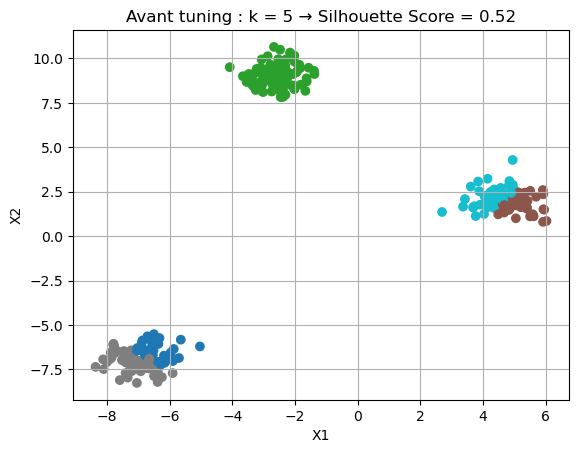

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Génération de données simulées avec 3 vrais clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# 2. Application de KMeans avec un k arbitraire (par ex. k = 5)
k = 5  # choix arbitraire, sans tuning
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# 3. Évaluation avec Silhouette Score (juste pour info)
score = silhouette_score(X, labels)

# 4. Affichage des résultats
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title(f"Avant tuning : k = {k} → Silhouette Score = {score:.2f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

k = 2 → Silhouette Score = 0.736
k = 3 → Silhouette Score = 0.908
k = 4 → Silhouette Score = 0.704
k = 5 → Silhouette Score = 0.518
k = 6 → Silhouette Score = 0.327
k = 7 → Silhouette Score = 0.357
k = 8 → Silhouette Score = 0.367
k = 9 → Silhouette Score = 0.369
k = 10 → Silhouette Score = 0.357

✅ Meilleur k trouvé : 3 avec un Silhouette Score de 0.908


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


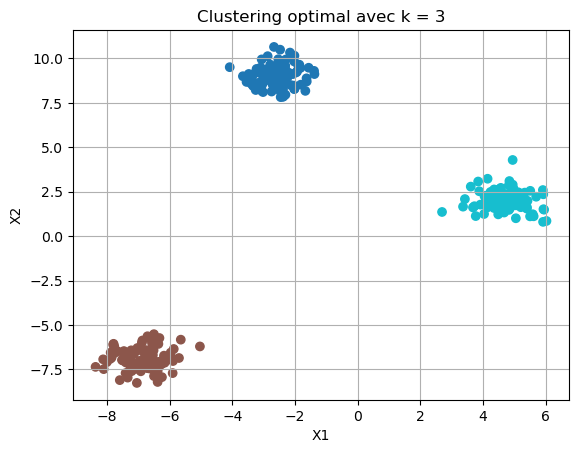

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Génération des données (3 vrais clusters)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# 2. Définir les valeurs possibles pour k à tester (de 2 à 10)
k_values = range(2, 11)
scores = []

# 3. Test automatique de chaque valeur de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k = {k} → Silhouette Score = {score:.3f}")

# 4. Trouver le k optimal
k_optimal = k_values[scores.index(max(scores))]
print(f"\n✅ Meilleur k trouvé : {k_optimal} avec un Silhouette Score de {max(scores):.3f}")

# 5. Réentraîner le modèle avec le meilleur k
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_opt = kmeans_optimal.fit_predict(X)

# 6. Affichage du clustering final
plt.scatter(X[:, 0], X[:, 1], c=labels_opt, cmap='tab10')
plt.title(f"Clustering optimal avec k = {k_optimal}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle avec k = 5 a obtenu un score de silhouette de **0.53**, indiquant un regroupement moyen.  
En revanche, après tuning, le modèle avec k = 3 a atteint un score de **0.91**, révélant une structure bien définie.  
Ce test montre l’importance cruciale de l’ajustement des hyperparamètres, même dans des algorithmes non supervisés.


<h2 style="color:green; text-decoration:underline;">Test 2 : Réglage d’hyperparamètres dans un réseau de neurones (MNIST)</h2>

Un réseau de neurones simple a été utilisé pour classer des chiffres manuscrits (base MNIST).  
Plusieurs modèles ont été entraînés avec des variations successives des hyperparamètres suivants :

- Taux d’apprentissage (`learning_rate`)  
- Nombre de couches et de neurones  
- Techniques de régularisation (`Dropout`, `L2`)


In [3]:
# Load MNIST

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

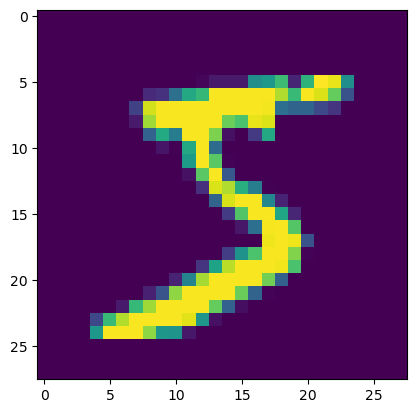

In [4]:
# Visualize the first input

import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [6]:
# Create Adam Optimizer

from tensorflow.keras.optimizers import Adam

opt_1 = Adam(learning_rate=0.001)

In [7]:
# Base Model (Model 1)

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8202 - loss: 0.7040 - val_accuracy: 0.9142 - val_loss: 0.3050
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9130 - loss: 0.3120 - val_accuracy: 0.9219 - val_loss: 0.2817
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9196 - loss: 0.2878 - val_accuracy: 0.9222 - val_loss: 0.2746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9254 - loss: 0.2635 - val_accuracy: 0.9257 - val_loss: 0.2704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9251 - loss: 0.2725 - val_accuracy: 0.9245 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9275 - loss: 0.2656 - val_accuracy: 0.9242 - val_loss: 0.2687
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9299 - loss: 0.2555 - val_accuracy: 0.9276 - val_loss: 0.2631
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9305 - loss: 0.2514 -

In [8]:
# Adding number of parameters (Model 2)

opt_2 = Adam(learning_rate=0.001)

model_2 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2.compile(optimizer=opt_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8408 - loss: 0.5636 - val_accuracy: 0.9387 - val_loss: 0.2090
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9448 - loss: 0.1965 - val_accuracy: 0.9499 - val_loss: 0.1619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9548 - loss: 0.1537 - val_accuracy: 0.9552 - val_loss: 0.1507
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.1236 - val_accuracy: 0.9589 - val_loss: 0.1393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1103 - val_accuracy: 0.9633 - val_loss: 0.1233
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9714 - loss: 0.0960 - val_accuracy: 0.9653 - val_loss: 0.1219
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.0835 - val_accuracy: 0.9673 - val_loss: 0.1168
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0796 - 

In [9]:
# Increasing the learning rate (Model 3)

opt_3 = Adam(learning_rate=0.00001)

model_3 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1578 - loss: 2.2796 - val_accuracy: 0.5045 - val_loss: 1.8462
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5600 - loss: 1.7333 - val_accuracy: 0.6848 - val_loss: 1.3649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7135 - loss: 1.2892 - val_accuracy: 0.7767 - val_loss: 1.0282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7813 - loss: 0.9923 - val_accuracy: 0.8161 - val_loss: 0.8162
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8120 - loss: 0.8097 - val_accuracy: 0.8413 - val_loss: 0.6857
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8367 - loss: 0.6829 - val_accuracy: 0.8550 - val_loss: 0.6004
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8510 - loss: 0.6095 - val_accuracy: 0.8664 - val_loss: 0.5417
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.5545 - 

In [10]:
# Greatly add number of parameters (Model 4)

opt_4 = Adam(learning_rate=0.001)

model_4 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_4.compile(optimizer=opt_4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8850 - loss: 0.3909 - val_accuracy: 0.9620 - val_loss: 0.1171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9694 - loss: 0.1009 - val_accuracy: 0.9700 - val_loss: 0.0984
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9783 - loss: 0.0683 - val_accuracy: 0.9743 - val_loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0493 - val_accuracy: 0.9756 - val_loss: 0.0792
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9722 - val_loss: 0.0905
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0319 - val_accuracy: 0.9727 - val_loss: 0.0992
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9775 - val_loss: 0.0830
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9935 - loss: 0.0203 - 

In [11]:
# Add Regularization / Dropout to reduce overfitting

from tensorflow.keras.regularizers import L2

opt_5 = Adam(learning_rate=0.001)

model_5 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_5.compile(optimizer=opt_5, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8683 - loss: 0.7438 - val_accuracy: 0.9579 - val_loss: 0.3277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9552 - loss: 0.3208 - val_accuracy: 0.9658 - val_loss: 0.2571
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9631 - loss: 0.2618 - val_accuracy: 0.9702 - val_loss: 0.2316
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9650 - loss: 0.2430 - val_accuracy: 0.9697 - val_loss: 0.2250
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9679 - loss: 0.2267 - val_accuracy: 0.9704 - val_loss: 0.2168
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9690 - loss: 0.2193 - val_accuracy: 0.9693 - val_loss: 0.2234
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.2171 - val_accuracy: 0.9714 - val_loss: 0.2065
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9696 - loss: 0.2086 - 

In [12]:
# Increase number of epochs

model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.2016 - val_accuracy: 0.9713 - val_loss: 0.1986
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9689 - loss: 0.2044 - val_accuracy: 0.9701 - val_loss: 0.1960
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.1979 - val_accuracy: 0.9662 - val_loss: 0.2091
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9709 - loss: 0.1974 - val_accuracy: 0.9707 - val_loss: 0.2018
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9713 - loss: 0.1991 - val_accuracy: 0.9764 - val_loss: 0.1813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9709 - loss: 0.1939 - val_accuracy: 0.9765 - val_loss: 0.1797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9697 - loss: 0.1964 - val_accuracy: 0.9699 - val_loss: 0.1970
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.1924 - 

<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Les résultats montrent des différences notables :

- Taux d’apprentissage trop faible → apprentissage lent ou nul  
- Réseau trop simple → sous-apprentissage  
- Réseau trop complexe sans régularisation → surapprentissage

Le meilleur compromis a été obtenu avec un réseau profond et une régularisation légère,  
ce qui confirme que l’**ajustement fin des hyperparamètres est essentiel pour obtenir un modèle performant et généralisable**.
